C:\Users\icebe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\icebe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


--- 63.47771668434143 seconds ---


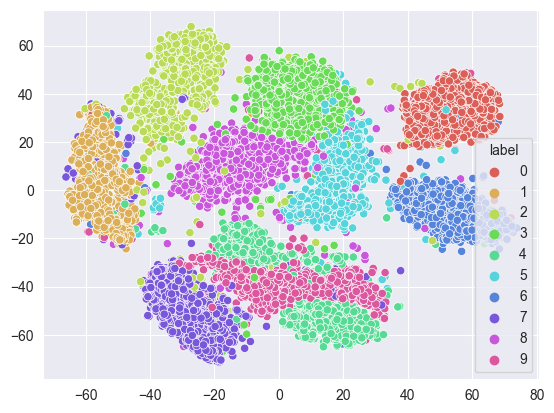

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

start_time = time.time()


train = pd.read_csv('mnist_test.csv')
label = train["label"]


tsne = TSNE(n_components = 2, random_state=123, perplexity=50)
tsne_res = tsne.fit_transform(train)

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

print("--- %s seconds ---" % (time.time() - start_time))

--- 60.02222490310669 seconds ---


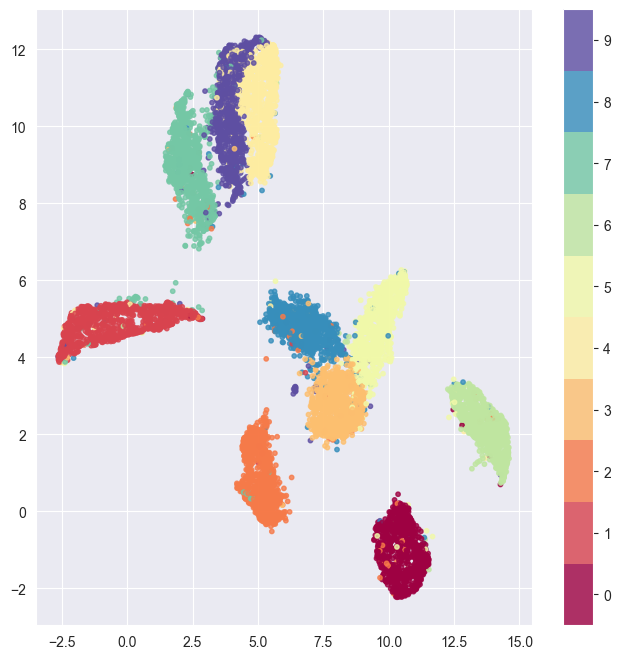

In [3]:
import umap
start_time = time.time()
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(train.iloc[:20000, 1:])

plt.figure(figsize=(8,8))
plt.scatter(embedding[:20000, 0], embedding[:20000, 1],
            c=train.iloc[:20000, 0],
            alpha=0.80,
            s=10,
            cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
print("--- %s seconds ---" % (time.time() - start_time))